# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0, 0.5, 'quantity')

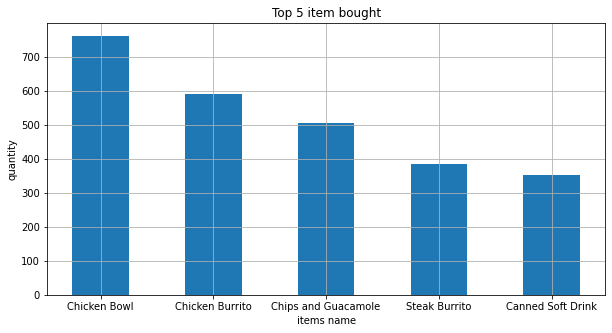

In [5]:
top_items = pd.DataFrame(chipo.groupby(['item_name'])['quantity'].sum().sort_values(ascending = False).head(5)).reset_index()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_items['item_name'], top_items['quantity'], width = 0.5)
ax.grid()
plt.title('Top 5 item bought')
plt.xlabel('items name')
plt.ylabel('quantity')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
chipo['item_price'] = chipo['item_price'].str.replace('$','')
chipo['item_price'] = chipo['item_price'].str.replace(' ','')
chipo['item_price'] = chipo['item_price'].apply(float)

/tmp/ipykernel_598/2146072271.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$','')


In [7]:
chipo_group = chipo.groupby('order_id').sum()

Text(0, 0.5, 'b')

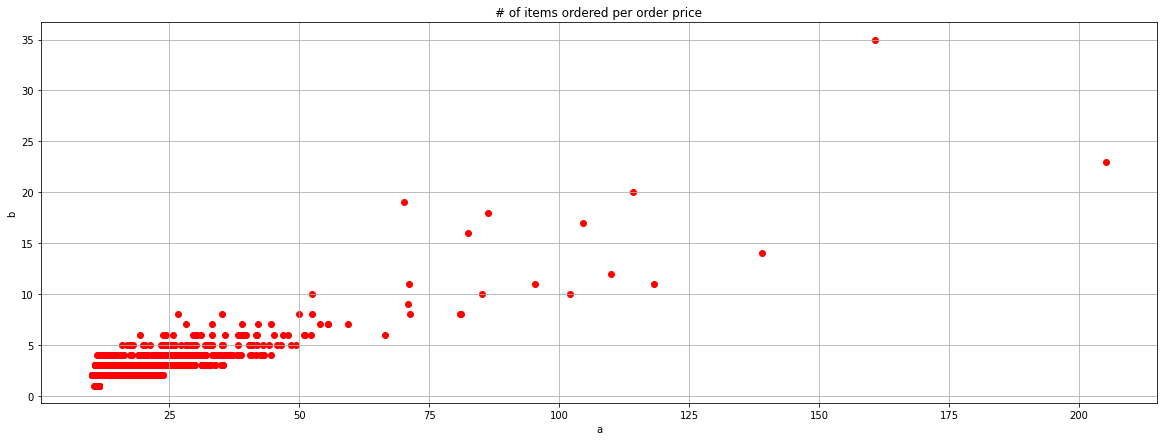

In [8]:
fig, ax2 = plt.subplots(figsize=(20,7))
ax2.scatter(chipo_group.item_price, chipo_group.quantity, c = 'red')
ax2.grid()
plt.title('# of items ordered per order price')
plt.xlabel('a')
plt.ylabel('b')

### Step 7. BONUS: Create a question and a graph to answer your own question.

Text(0, 0.5, 'item price')

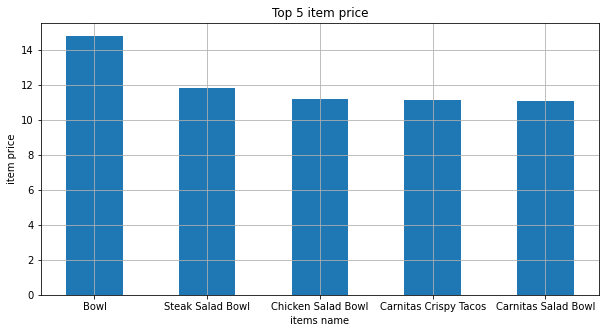

In [9]:
# Which are the 5 items with the highest price on avg.

top_items2 = chipo.groupby('item_name')['item_price'].mean().sort_values(ascending = False).head(5)
top_items2 = top_items2.reset_index()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_items2['item_name'], top_items2['item_price'], width = 0.5)
ax.grid()
plt.title('Top 5 item price')
plt.xlabel('items name')
plt.ylabel('item price')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe744348-fecc-4b7a-803c-44dba24ecb38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>